In [2]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.read_csv('SteamData.csv')
df = df1.copy()


In [3]:
df1.head(100)

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,https://store.steampowered.com/app/227940/Hero...,app,Heroes & Generals,"Shoot, blow sh!t up, fly or bark orders in the...","Mixed,(906),- 56% of the 906 user reviews in t...","Mixed,(101,309),- 65% of the 101,309 user revi...","Oct 18, 2016",RETO MOTO,"RETO MOTO,RETO MOTO","Free to Play,World War II,FPS,Multiplayer,War,...","Multi-player,Online Multi-Player,MMO,Online Co...","English,French,German,Spanish - Spain,Czech,Po...",NaN,"Action,Free to Play,Indie,

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       1499 non-null   object 
 1   types                     1498 non-null   object 
 2   name                      1498 non-null   object 
 3   desc_snippet              1496 non-null   object 
 4   recent_reviews            1065 non-null   object 
 5   all_reviews               1327 non-null   object 
 6   release_date              1340 non-null   object 
 7   developer                 1496 non-null   object 
 8   publisher                 1493 non-null   object 
 9   popular_tags              1345 non-null   object 
 10  game_details              1484 non-null   object 
 11  languages                 1496 non-null   object 
 12  achievements              950 non-null    float64
 13  genre                     1496 non-null   object 
 14  game_des

# **Preprocessing**

In [5]:
#removing unwanted columns
df = df.drop(['url','types','desc_snippet','all_reviews','game_details','publisher'] ,  axis=1)
df = df.drop([ 'popular_tags','languages','game_description','mature_content','minimum_requirements','recommended_requirements'], axis=1)

In [6]:
import pandas as pd

df.loc[:,'original_price'] = df['original_price'].fillna(df['discount_price'])
df = df.drop(['discount_price'],axis=1)

df = df.dropna(subset=['recent_reviews', 'developer', 'genre'])

df.loc[:,'achievements'].fillna(0, inplace=True)
exchange_rate = 281

df.loc[:,'original_price'] = pd.to_numeric(df['original_price'].str.replace('[\$,]', '', regex=True), errors='coerce')

df.loc[:,'original_price'] = df['original_price'].apply(lambda x: 'Free to Play' if pd.isna(x) else x * exchange_rate)

df.loc[:, 'release_date'] = pd.to_datetime(df['release_date'], format='%b %d, %Y', errors='coerce').dt.date
df.loc[:,'release_date'] = df['release_date'].fillna('not mentioned')
df.head(100)


,name,recent_reviews,release_date,developer,achievements,genre,original_price
0,DOOM,"Very Positive,(554),- 89% of the 554 user revi...",2016-05-12,id Software,54.0,Action,5617.19
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...",2017-12-21,PUBG Corporation,37.0,"Action,Adventure,Massively Multiplayer",8427.19
2,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...",2018-04-24,Harebrained Schemes,128.0,"Action,Adventure,Strategy",11237.19
3,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...",2018-12-13,Bohemia Interactive,0.0,"Action,Adventure,Massively Multiplayer",12642.19
4,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...",2003-05-06,CCP,0.0,"Action,Free to Play,Massively Multiplayer,RPG,...",Free to Play
...,...,...,...,...,...,...,...
123,Warface,"Mixed,(498),- 60% of the 498 user reviews in t...",2014-07-01,MY.GAMES,30.0,"Action,Free to Play,Massively Multiplayer",Free to Play
124,Assassin's Creed® Origins,"Mostly Positive,(359),- 73% of the 359 user re...",2017-10-26,Ubisoft Montreal,67.0,"Action,Adventure,RPG",16857.19
125,House Party,"Very Positive,(117),- 85% of the 117 user revi...",2017-06-30,"Eek! Games, LLC",32.0,"Adventure,Casual,Indie,Simulation,Early Access",4212.19
126,Empyrion - Galactic Survival,"Mostly Positive,(135),- 79% of the 135 user re...",2015-08-05,Eleon Game Studios,0.0,"Adventure,Indie,Simulation,Strategy,Early Access",5617.19


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1061 entries, 0 to 1494
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1061 non-null   object 
 1   recent_reviews  1061 non-null   object 
 2   release_date    1061 non-null   object 
 3   developer       1061 non-null   object 
 4   achievements    1061 non-null   float64
 5   genre           1061 non-null   object 
 6   original_price  1061 non-null   object 
dtypes: float64(1), object(6)
memory usage: 66.3+ KB


In [8]:
null_values = df.isnull().sum()
print(null_values)

name              0
recent_reviews    0
release_date      0
developer         0
achievements      0
genre             0
original_price    0
dtype: int64


# **Saving Cleaned File**

In [189]:
csv_filename = 'CleanedSteamData.csv'
df.to_csv(csv_filename, index=False)

print(f"DataFrame has been successfully converted to '{csv_filename}'.")

DataFrame has been successfully converted to 'CleanedSteamData.csv'.


# **Feature Engineering**

**Categorical Encoding**

In [9]:
# Sentiment Encoding
df['sentiment'] = df['recent_reviews'].apply(lambda x: 1 if 'Very Positive' in x else (-1 if 'Mixed' in x else 0))


# Developer Popularity Calculation
developer_popularity = df['developer'].value_counts().to_dict()
df['developer_popularity'] = df['developer'].map(developer_popularity)

**Numerical Transformation**

In [10]:
# 4. Discount Percentage
df['discount_percentage'] = df.apply(lambda row: ((float(row['original_price']) - float(row['achievements'])) / float(row['original_price']) * 100) if row['original_price'] and row['achievements'] and row['original_price'] != 'Free to Play' else 0, axis=1)

# Age of the Game Calculation
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['age_of_game'] = (pd.to_datetime('now') - df['release_date']).dt.days / 365

**Feature Scaling**

In [11]:
# Free-to-Play Categorization
df['free_to_play'] = df['original_price'].apply(lambda x: 1 if 'Free' in str(x) else 0)

# Multiplayer or Single Player Flagging
df['multiplayer'] = df['genre'].apply(lambda x: 1 if 'Multiplayer' in x else -1)

**Aggregation and Grouping**

In [12]:
sentiment_mapping = {
    'Very Positive': 4,
    'Overwhelmingly Positive' : 3,
    'Mostly Positive': 2,
    'Mixed': 1,
}

genre_reviews = {}

for index, row in df.iterrows():

    genres = row['genre'].split(',')
    for genre in genres:
        genre = genre.strip()
        if genre not in genre_reviews:
            genre_reviews[genre] = {'total_reviews': 0, 'num_games': 0}

        if isinstance(row['recent_reviews'], str):
            sentiment_label = row['recent_reviews'].split(',')[0].strip()
            sentiment_value = sentiment_mapping.get(sentiment_label, 0)
            genre_reviews[genre]['total_reviews'] += sentiment_value
            genre_reviews[genre]['num_games'] += 1

for genre, reviews_data in genre_reviews.items():
    total_reviews = reviews_data['total_reviews']
    num_games = reviews_data['num_games']

    if num_games > 0:
        average_reviews = total_reviews / num_games
    else:
        average_reviews = 0
    df.loc[df['genre'].str.contains(genre), 'average_reviews'] = average_reviews

df.head(100)


,name,recent_reviews,release_date,developer,achievements,genre,original_price,sentiment,developer_popularity,discount_percentage,age_of_game,free_to_play,multiplayer,average_reviews
0,DOOM,"Very Positive,(554),- 89% of the 554 user revi...",2016-05-12,id Software,54.0,Action,5617.19,1,11,99.038665,7.980822,0,-1,2.846293
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...",2017-12-21,PUBG Corporation,37.0,"Action,Adventure,Massively Multiplayer",8427.19,-1,1,99.560945,6.369863,0,1,1.554348
2,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...",2018-04-24,Harebrained Schemes,128.0,"Action,Adventure,Strategy",11237.19,-1,3,98.860925,6.030137,0,-1,2.696113
3,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...",2018-12-13,Bohemia Interactive,0.0,"Action,Adventure,Massively Multiplayer",12642.19,-1,2,0.000000,5.391781,0,1,1.554348
4,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...",2003-05-06,CCP,0.0,"Action,Free to Play,Massively Multiplayer,RPG,...",Free to Play,-1,1,0.000000,21.008219,1,1,2.652632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Warface,"Mixed,(498),- 60% of the 498 user reviews in t...",2014-07-01,MY.GAMES,30.0,"Action,Free to Play,Massively Multiplayer",Free to Play,-1,1,0.000000,9.846575,1,1,1.788462
124,Assassin's Creed® Origins,"Mostly Positive,(359),- 73% of the 359 user re...",2017-10-26,Ubisoft Montreal,67.0,"Action,Adventure,RPG",16857.19,0,9,99.602543,6.523288,0,-1,2.652632
125,House Party,"Very Positive,(117),- 85% of the 117 user revi...",2017-06-30,"Eek! Games, LLC",32.0,"Adventure,Casual,Indie,Simulation,Early Access",4212.19,1,1,99.240300,6.846575,0,-1,3.078947
126,Empyrion - Galactic Survival,"Mostly Positive,(135),- 79% of the 135 user re...",2015-08-05,Eleon Game Studios,0.0,"Adventure,Indie,Simulation,Strategy,Early Access",5617.19,0,1,0.000000,8.750685,0,-1,2.674912


# **CONTENT BASED FILTERING**

# **Bag-of-Words** (TF-IDF)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

features = df[['name', 'genre', 'average_reviews', 'developer_popularity', 'recent_reviews','age_of_game','free_to_play','multiplayer','discount_percentage']]

# Convertn to a bag-of-words using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(features['genre'])



# **Cosine Similarity**

In [14]:
features_matrix = features[['average_reviews', 'developer_popularity', 'discount_percentage']].values
combined_matrix = linear_kernel(tfidf_matrix, tfidf_matrix) + linear_kernel(features_matrix, features_matrix)

def get_genre_recommendations(genre, cosine_sim=combined_matrix, features=features):
    genre = genre.lower()
    idx = features.index[features['genre'].str.lower() == genre].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]

    game_indices = [x[0] for x in sim_scores]

    recommended_games = features.iloc[game_indices].sort_values(by='recent_reviews', ascending=False).head(10)

    return recommended_games['name']


**Trending genres**

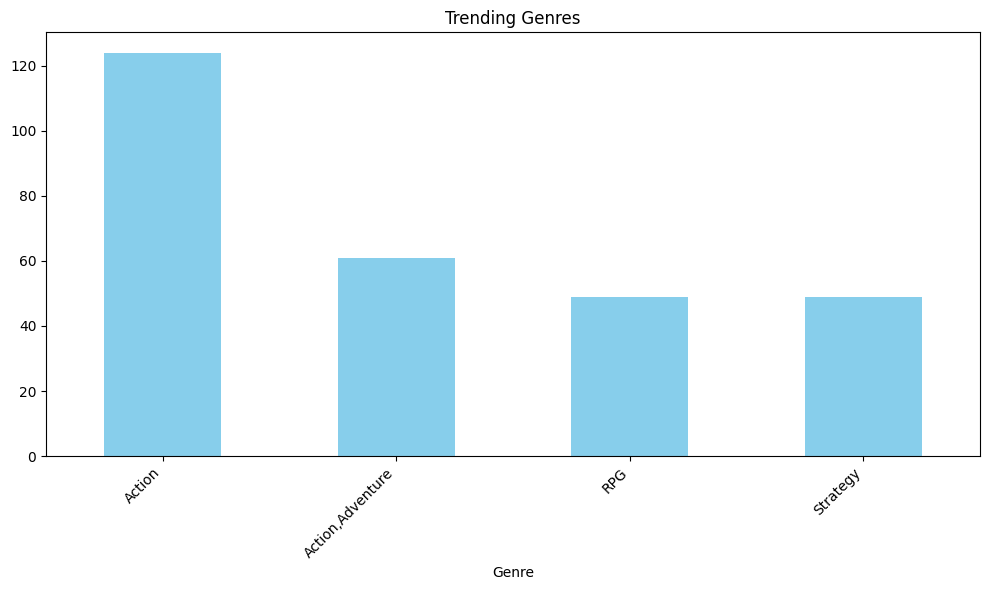

In [15]:
import matplotlib.pyplot as plt

genre_counts = df['genre'].value_counts()
trending_genres = genre_counts[genre_counts > 40].index.tolist()
trending_genres_counts = genre_counts[genre_counts.index.isin(trending_genres)]
plt.figure(figsize=(10, 6))
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
trending_genres_counts.plot(kind='bar', color='skyblue')
plt.title('Trending Genres')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **User Interface**

In [35]:
def suggest_trending_games_by_genre():
    genre = input("Enter a genre: ")
    recommended_games = get_genre_recommendations(genre)
    print(f"\nTrending games for {genre}:")
    for game in recommended_games:
        print(game)

suggest_trending_games_by_genre()

Enter a genre: Indie

Trending games for Indie:
DRAGON QUEST® XI: Echoes of an Elusive Age™ - Digital Edition of Light
Oxygen Not Included
Attack on Titan 2 - A.O.T.2 - 進撃の巨人２
RESIDENT EVIL 2 / BIOHAZARD RE:2
Icewind Dale: Enhanced Edition
CHRONO TRIGGER®
DEAD OR ALIVE 6
Secret of Mana
Fallout 4 VR
FINAL FANTASY XII THE ZODIAC AGE


In [16]:
import plotly.express as px

df_trending_genres = df[df['genre'].isin(trending_genres)]

df_trending_genres_sorted = df_trending_genres.sort_values(by='achievements', ascending=False)

df_top_10_games = pd.DataFrame()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
for genre in trending_genres:
    top_10_games_genre = df_trending_genres_sorted[df_trending_genres_sorted['genre'] == genre].head(10)
    df_top_10_games = pd.concat([df_top_10_games, top_10_games_genre])

fig = px.box(df_top_10_games, x='genre', y='achievements',
             title='Distribution of Achievements for Top 10 Games in Trending Genres',
             labels={'genre': 'Genre', 'achievements': 'Achievements'})

fig.update_layout(xaxis_title='Genre', yaxis_title='Achievements')

fig.show()


**Assigning values to Trending games**

In [17]:
import numpy as np
df['trending'] = 0

for genre in trending_genres:
    recommended_games = get_genre_recommendations(genre)
    df.loc[df['name'].isin(recommended_games), 'trending'] = 1

df.head(100)


,name,recent_reviews,release_date,developer,achievements,genre,original_price,sentiment,developer_popularity,discount_percentage,age_of_game,free_to_play,multiplayer,average_reviews,trending
0,DOOM,"Very Positive,(554),- 89% of the 554 user revi...",2016-05-12,id Software,54.0,Action,5617.19,1,11,99.038665,7.980822,0,-1,2.846293,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...",2017-12-21,PUBG Corporation,37.0,"Action,Adventure,Massively Multiplayer",8427.19,-1,1,99.560945,6.369863,0,1,1.554348,0
2,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...",2018-04-24,Harebrained Schemes,128.0,"Action,Adventure,Strategy",11237.19,-1,3,98.860925,6.030137,0,-1,2.696113,0
3,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...",2018-12-13,Bohemia Interactive,0.0,"Action,Adventure,Massively Multiplayer",12642.19,-1,2,0.000000,5.391781,0,1,1.554348,0
4,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...",2003-05-06,CCP,0.0,"Action,Free to Play,Massively Multiplayer,RPG,...",Free to Play,-1,1,0.000000,21.008219,1,1,2.652632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Warface,"Mixed,(498),- 60% of the 498 user reviews in t...",2014-07-01,MY.GAMES,30.0,"Action,Free to Play,Massively Multiplayer",Free to Play,-1,1,0.000000,9.846575,1,1,1.788462,0
124,Assassin's Creed® Origins,"Mostly Positive,(359),- 73% of the 359 user re...",2017-10-26,Ubisoft Montreal,67.0,"Action,Adventure,RPG",16857.19,0,9,99.602543,6.523288,0,-1,2.652632,1
125,House Party,"Very Positive,(117),- 85% of the 117 user revi...",2017-06-30,"Eek! Games, LLC",32.0,"Adventure,Casual,Indie,Simulation,Early Access",4212.19,1,1,99.240300,6.846575,0,-1,3.078947,0
126,Empyrion - Galactic Survival,"Mostly Positive,(135),- 79% of the 135 user re...",2015-08-05,Eleon Game Studios,0.0,"Adventure,Indie,Simulation,Strategy,Early Access",5617.19,0,1,0.000000,8.750685,0,-1,2.674912,0


## **MACHINE LEARNING MODELS**

# **Logistic Regression**

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Features for logistic regression
logistic_features = df[['average_reviews', 'developer_popularity', 'discount_percentage', 'sentiment']]

# Target variable
target = df['trending']
oversampler = RandomOverSampler(sampling_strategy=0.55, random_state=42)
logistic_features_resampled, target_resampled = oversampler.fit_resample(logistic_features, target)
X_train, X_test, y_train, y_test = train_test_split(logistic_features_resampled, target_resampled, test_size=0.2, random_state=42)


model = LogisticRegression()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions,zero_division=0))


Accuracy: 0.8633540372670807
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       216
           1       0.86      0.70      0.77       106

    accuracy                           0.86       322
   macro avg       0.86      0.82      0.84       322
weighted avg       0.86      0.86      0.86       322



# **Random Forest**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Features for Random Forest
rf_features = df[['average_reviews', 'developer_popularity', 'discount_percentage', 'sentiment']]

# Target variable
target = df['trending']
oversampler = RandomOverSampler(sampling_strategy=0.9, random_state=42)
rf_features_resampled, target_resampled = oversampler.fit_resample(rf_features, target)
target_resampled_int = target_resampled.astype(int)
y_tests = target_resampled_int


X_train, X_test, y_train, y_test = train_test_split(rf_features_resampled, y_tests, test_size=0.2, random_state=32)

model = RandomForestClassifier()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
report = classification_report(y_test, predictions, output_dict=True)
for label, scores in report.items():
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"Class {label}:")
        print(f"  Precision: {scores['precision']}")
        print(f"  Recall: {scores['recall']}")
        print(f"  F1-score: {scores['f1-score']}")


Accuracy: 0.8924050632911392
Classification Report:
Class 0:
  Precision: 0.9
  Recall: 0.884375
  F1-score: 0.8921259842519685
Class 1:
  Precision: 0.8854368932038835
  Recall: 0.9
  F1-score: 0.8926650366748167


# **DEEP LEARNING MODELS**

# **ANN**(Artificial neural network)

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler

# Features for ANN
ann_features = df[['average_reviews', 'developer_popularity', 'discount_percentage']]

# Target variable
target = df['trending']

target = np.array(target)

oversampler = RandomOverSampler(sampling_strategy=0.98, random_state=42)
ann_features_resampled, target_resampled = oversampler.fit_resample(ann_features, target)
X_train, X_test, y_train, y_test = train_test_split(ann_features_resampled, target_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))l
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

predictions_proba = model.predict(X_test_scaled)
predictions = (predictions_proba > 0.5).astype(int).flatten()

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)


Epoch 1/10
52/52 [==============================] - 2s 12ms/step - loss: 0.5369 - accuracy: 0.7179 - val_loss: 0.4230 - val_accuracy: 0.8083
Epoch 2/10
52/52 [==============================] - 0s 9ms/step - loss: 0.4180 - accuracy: 0.7514 - val_loss: 0.3815 - val_accuracy: 0.7985
Epoch 3/10
52/52 [==============================] - 0s 8ms/step - loss: 0.4028 - accuracy: 0.7866 - val_loss: 0.3760 - val_accuracy: 0.8204
Epoch 4/10
52/52 [==============================] - 0s 8ms/step - loss: 0.3956 - accuracy: 0.7812 - val_loss: 0.3699 - val_accuracy: 0.8010
Epoch 5/10
52/52 [==============================] - 0s 7ms/step - loss: 0.3921 - accuracy: 0.7903 - val_loss: 0.3644 - val_accuracy: 0.8010
Epoch 6/10
52/52 [==============================] - 0s 8ms/step - loss: 0.3913 - accuracy: 0.7787 - val_loss: 0.3628 - val_accuracy: 0.8010
Epoch 7/10
52/52 [==============================] - 0s 8ms/step - loss: 0.3874 - accuracy: 0.7848 - val_loss: 0.3642 - val_accuracy: 0.8083
Epoch 8/10
52/52 [=

# **LSTM**(Long Short-Term Memory)

In [97]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from imblearn.over_sampling import SMOTE

# Features for LSTM
lstm_features = df[['average_reviews', 'developer_popularity', 'discount_percentage']]

# Target variable
target = df['trending']

target = np.array(target)

smote = SMOTE(sampling_strategy=0.5, random_state=42)
lstm_features_resampled, target_resampled = smote.fit_resample(lstm_features, target)
X_train, X_test, y_train, y_test = train_test_split(lstm_features_resampled, target_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1, class_weight=class_weights)
predictions_proba = model.predict(X_test_reshaped)
predictions = (predictions_proba > 0.5).astype(int).flatten()


accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)


Epoch 1/10
39/39 [==============================] - 4s 22ms/step - loss: 4.3016 - accuracy: 0.7055 - val_loss: 0.6563 - val_accuracy: 0.8269
Epoch 2/10
39/39 [==============================] - 0s 9ms/step - loss: 4.0425 - accuracy: 0.7841 - val_loss: 0.6078 - val_accuracy: 0.8109
Epoch 3/10
39/39 [==============================] - 0s 4ms/step - loss: 3.7076 - accuracy: 0.7761 - val_loss: 0.5484 - val_accuracy: 0.7917
Epoch 4/10
39/39 [==============================] - 0s 4ms/step - loss: 3.3328 - accuracy: 0.7681 - val_loss: 0.4896 - val_accuracy: 0.7917
Epoch 5/10
39/39 [==============================] - 0s 4ms/step - loss: 3.0202 - accuracy: 0.7729 - val_loss: 0.4455 - val_accuracy: 0.8045
Epoch 6/10
39/39 [==============================] - 0s 4ms/step - loss: 2.8281 - accuracy: 0.7761 - val_loss: 0.4160 - val_accuracy: 0.8077
Epoch 7/10
39/39 [==============================] - 0s 4ms/step - loss: 2.7198 - accuracy: 0.7841 - val_loss: 0.3985 - val_accuracy: 0.8141
Epoch 8/10
39/39 [=

# **PLOTLY VISUALIZATION**

In [99]:
import plotly.express as px

df_trending_genres = df[df['genre'].isin(trending_genres)]

genre_counts = df_trending_genres['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

fig = px.bar(genre_counts, x='genre', y='count', title='Distribution of Trending Games Across Genres',
             labels={'genre': 'Genre', 'count': 'Number of Games'},
             color='genre',
             color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_layout(xaxis_title='Genre', yaxis_title='Number of Trending Games', showlegend=False)

fig.show()


In [ ]:
import plotly.express as px

df_trending_genres = df[df['genre'].isin(trending_genres)]

df_trending_genres_sorted = df_trending_genres.sort_values(by='average_reviews', ascending=False)

df_top_5_positive_games = pd.DataFrame()

for genre in trending_genres:
    top_games_genre = df_trending_genres_sorted[df_trending_genres_sorted['genre'] == genre]
    top_5_positive_games_genre = top_games_genre[top_games_genre['sentiment'] == 1].head(5)
    df_top_5_positive_games = pd.concat([df_top_5_positive_games, top_5_positive_games_genre])

fig = px.bar(df_top_5_positive_games, x='name', y='average_reviews', color='genre',
             title='Top 5 Games  in Trending Genres',
             labels={'name': 'Game Name', 'average_reviews': 'Average Reviews', 'genre': 'Genre'})

fig.update_layout(xaxis_title='Game Name', yaxis_title='Average Reviews')

fig.show()


In [ ]:
import plotly.express as px

df['sentiment_label'] = df['sentiment'].map({1: 'Positive', -1: 'Negative'})

fig = px.histogram(df, x='sentiment_label', title='Sentiment Distribution',
                   labels={'sentiment_label': 'Sentiment', 'count': 'Count'},
                   color='sentiment_label')

fig.show()

